# Factors in Prosper Load Distributions

### By Chinonso Athanasius 

## Investigation Overview
In this investigation, am interested in figuring out what features are best for predicting the loan grant in (occupation, employmentstatus, term, loanstatus and prosperRating (Alpha).


## Dataset Overview
There are 83520 observations and 17 features in the dataset (loan status, borrower APR, prosperRating, occupation, loan number, loan original amount, recommendation, investors etc.) which include four(4) category, one(1) datetime64[ns], five(5) float64, six(6) int64 and one(1) string dtypes

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")

# Print the shape and first five rows of the dataset
print(f"Shape:", df.shape)
df.head()

Shape: (113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Data Cleaning

In [3]:
# Subsetting some features in the dataset
list = ["Term", "LoanStatus", "BorrowerAPR", "BorrowerRate", "LenderYield", "IncomeRange", "ProsperRating (Alpha)",
       "ListingCategory (numeric)", "Occupation", "EmploymentStatus", "LoanNumber", "LoanOriginalAmount",
        "LoanOriginationDate", "MonthlyLoanPayment", "LP_InterestandFees", "Recommendations", "Investors"]
# Assign new to df_new variable
df_list = df.loc[:, list]

# Convert LoanOriginationDate datatype from int to datetime
df_list["LoanOriginationDate"] = pd.to_datetime(df_list["LoanOriginationDate"])

# Convert some columns into categorical data type
col_features = ["LoanStatus", "Occupation", "EmploymentStatus", "ProsperRating (Alpha)"]

for col in col_features:
    df_list[col] = df_list[col].astype("category")
    
# Convert Income range object dtype to string column
df_list["IncomeRange"] = df_list["IncomeRange"].astype("string")

# Drop all missing values
df_list = df_list.dropna()

## Distribution of the dataset 
The BorrowerAPR, BorrowerRate and LenderYield follow a normal distribution which show how the loan is distributed. and Loan Original Date show that the recent years benefit higher loan than the previous years while LP-interest fee is centered between 0-1000 showing a significant right skewed trend.

Next let look at the Employment Status of the persons who took loan from prosper.

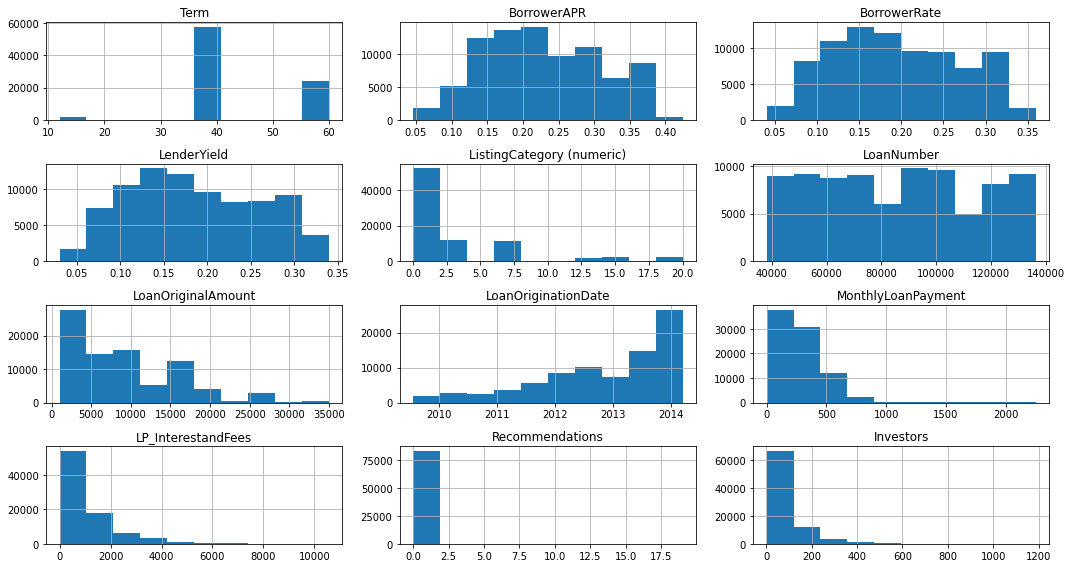

In [4]:
# Create a histogram of the entire dataset
df_list.hist(figsize=(15,8));
plt.tight_layout()

##  DISTRIBUTION OF EMPLOYMENT OF STATUS
There are more Employed persons which amount to (68000) followed by Full-Time (8000) and Part-Time is the least employment status.

Next let know what reasons the loan was collected i.e the Listing Category.

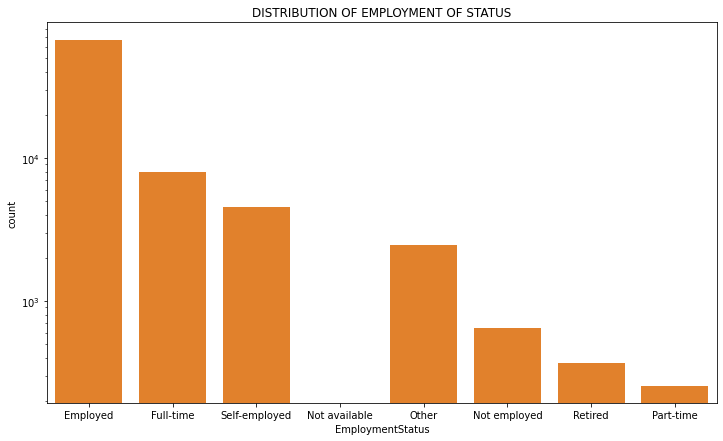

In [5]:
# Create a Countplot of the distributions of Employment Status
plt.figure(figsize=(12, 7))
color = sns.color_palette()[1]
order = ["Employed", "Full-time", "Self-employed", "Not available", "Other", "Not employed", "Retired", "Part-time"]
sns.countplot(data=df_list, x="EmploymentStatus", color=color, order=order)
plt.title("DISTRIBUTION OF EMPLOYMENT OF STATUS")
plt.yscale("log");

# Pie chart of the Term variable
The Pie chart show that 69% recieved 36 month (3 years) Term, 29.1% recieved 60 month (5 years) Term and only 19% recieved 12 month (1 year) Term.

Next in respect to the Term recieved lets consider their Occupations

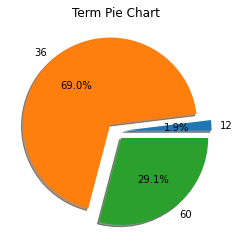

In [6]:
# Plot a pie chart of term column
pie = df_list.groupby("Term")["Term"].count()
plt.pie(pie, labels=pie.index, shadow=True, explode=(0.1, 0.1, 0.1), autopct="%1.1F%%")
plt.title("Term Pie Chart");

## Distribution of Occupation with Term
community college and Technical school student collected 36 months (3 years) term throughout the dataset while others has both 60 and 36 months term and non collected 12 month term in the occupation variable

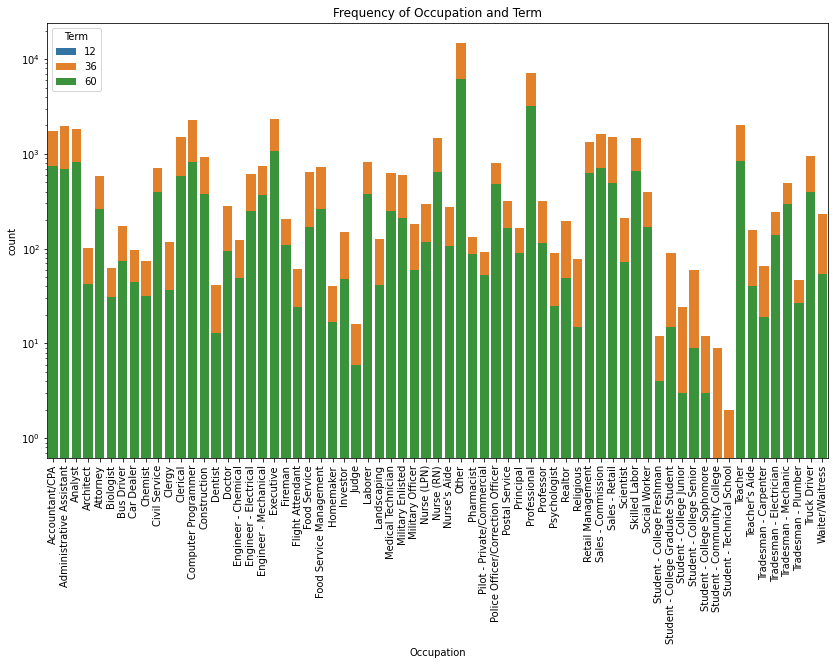

In [7]:
# Create a countplot of occcupation and stacked term
plt.figure(figsize=(14,8))
sns.countplot(data=df_list, x="Occupation", hue="Term", dodge=0)
plt.xticks(rotation=90)
plt.title("Frequency of Occupation and Term")
plt.yscale("log");

## BorrowerRate changes for different loan Terms when split up by ProsperRating
Interestingly, the borrowerAPR (Annual Percentage Rating) decreases with the increase of borrow term for people with HR & C ratings. the APR increase with the increase of borrow term.

lets look at relationships between the three categorical features

How the BorrowerRate changes for different loan terms when split up by ProsperRating?

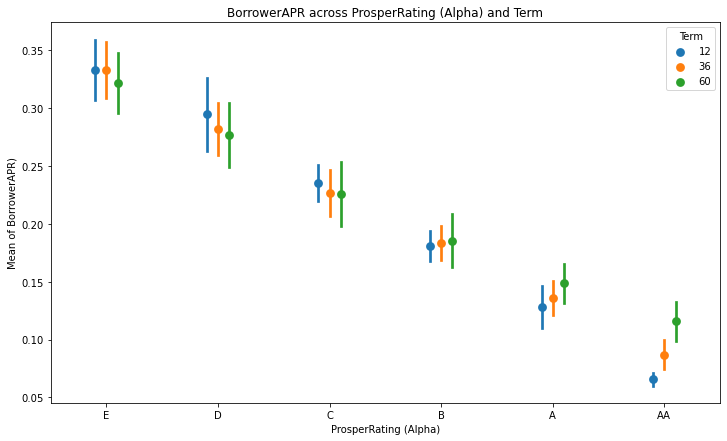

In [8]:
# Create a pointplot to show how the BorrowerRate changes for different loan Terms when split up by ProsperRating
plt.figure(figsize=(12,7))
order = ["E", "D", "C", "B", "A", "AA"]
sns.pointplot(data=df_list, x="ProsperRating (Alpha)", y="BorrowerAPR", hue="Term",
             palette="tab10", linestyles="", dodge=0.2, ci="sd", order=order)
plt.title("BorrowerAPR across ProsperRating (Alpha) and Term")
plt.ylabel("Mean of BorrowerAPR)");

## BorrowerRate across ProsperRating (Alpha) and Term
This seems to not make sense but for every single level of the ProsperRating. the BorrowerRate increases as for longer-term loans. i would think it to be the reverse as shorter-term loans usually carry a higher interest rate. This was not at all evident in the bivariate analysis and comes a bit as a surprise.

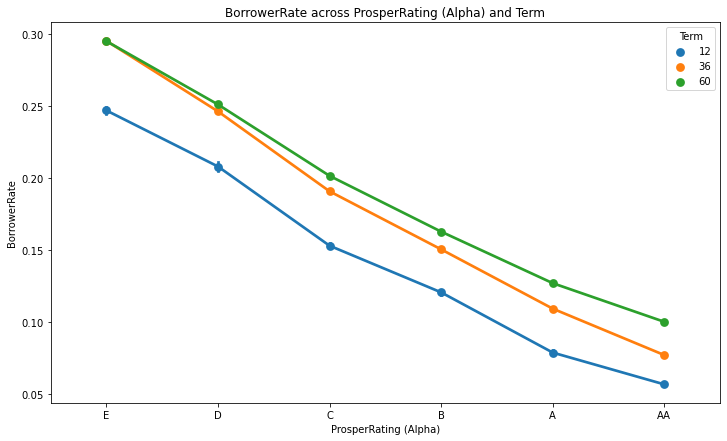

In [9]:
# Create a pointplot to show how the BorrowerRate changes for different loan Terms when split up by ProsperRating
plt.figure(figsize=(12,7))
order = ["E", "D", "C", "B", "A", "AA"]
sns.pointplot(data=df_list, x="ProsperRating (Alpha)", y="BorrowerRate", hue="Term", 
              palette="tab10", order=order)
plt.title("BorrowerRate across ProsperRating (Alpha) and Term")
plt.legend(loc=1, title="Term");

## DISTRIBUTION OF EMPLOYMENTSTATUS AND TERM
The employed has over 40k persons which collected 36 term (3 years) with over 1k persons collected 12 term (1 years) which has the highest value count.

The part-time has over 2k persons which collected 36 term (3 years) withe 10 persons collected 12 term (1 years) which has the lowest value count.

The Term follow a chronological order of (36-60-12) term in each employmentstatus.

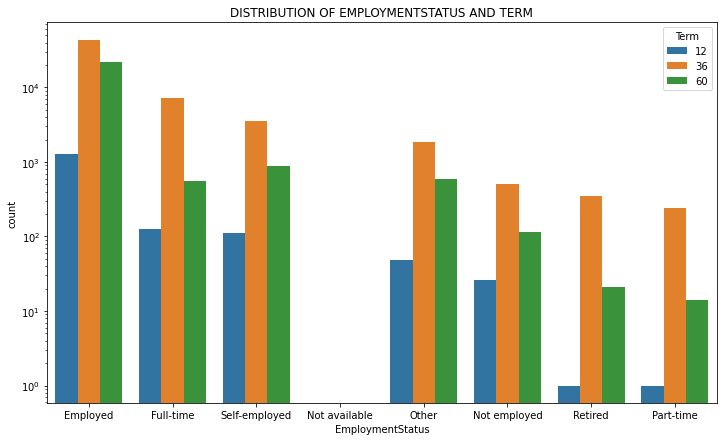

In [10]:
# Create employmentstatus and term
plt.figure(figsize=(12, 7))
order = ["Employed", "Full-time", "Self-employed", "Not available", "Other", "Not employed", "Retired", "Part-time"]
sns.countplot(data=df_list, x="EmploymentStatus", order=order, hue="Term")
plt.title("DISTRIBUTION OF EMPLOYMENTSTATUS AND TERM")
plt.yscale("log");

# THANK YOU

In [12]:
jupyter nbconvert Prosper_Loan_Part_11.ipynb --to slides --no-input --no-prompt --post serve

SyntaxError: invalid syntax (Temp/ipykernel_10084/89250509.py, line 1)